<a href="https://colab.research.google.com/github/suryawahyus/MachineLearning/blob/main/TaskWeek2/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

# Path ke file CSV di Google Drive
file_path = '/content/drive/MyDrive/Machine Learning/EconomiesOfScale.csv'

# Membaca dataset menggunakan pandas
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari dataset
print(df.head())

   Number of Units  Manufacturing Cost
0         1.000000           95.066056
1         1.185994           96.531750
2         1.191499           73.661311
3         1.204771           95.566843
4         1.298773           98.777013


In [5]:
df

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013
...,...,...
995,8.099710,23.855067
996,8.739752,27.536542
997,8.780888,25.973787
998,8.897700,25.138311


In [7]:
df.head(17)

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013
5,1.307435,100.000000
6,1.339386,94.759756
7,1.379044,67.185383
8,1.420000,72.886041
9,1.473948,61.967696


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [9]:
df.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

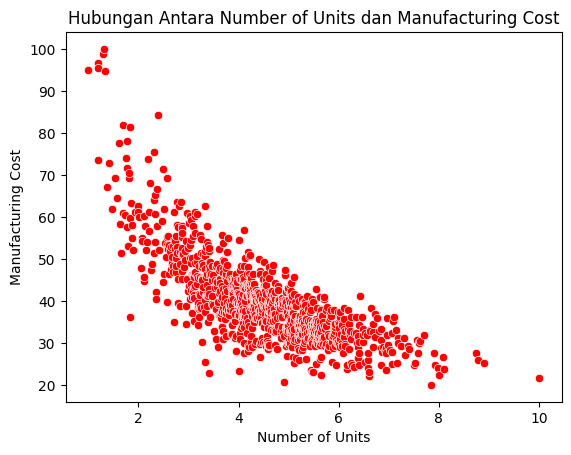

In [14]:
sns.scatterplot(x='Number of Units', y='Manufacturing Cost', data=df, color='red')
plt.title('Hubungan Antara Number of Units dan Manufacturing Cost')
plt.xlabel('Number of Units')
plt.ylabel('Manufacturing Cost')

plt.show()

In [15]:
# Mendefinisikan variabel x dan y
x = df['Number of Units']
y = df['Manufacturing Cost']

In [16]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

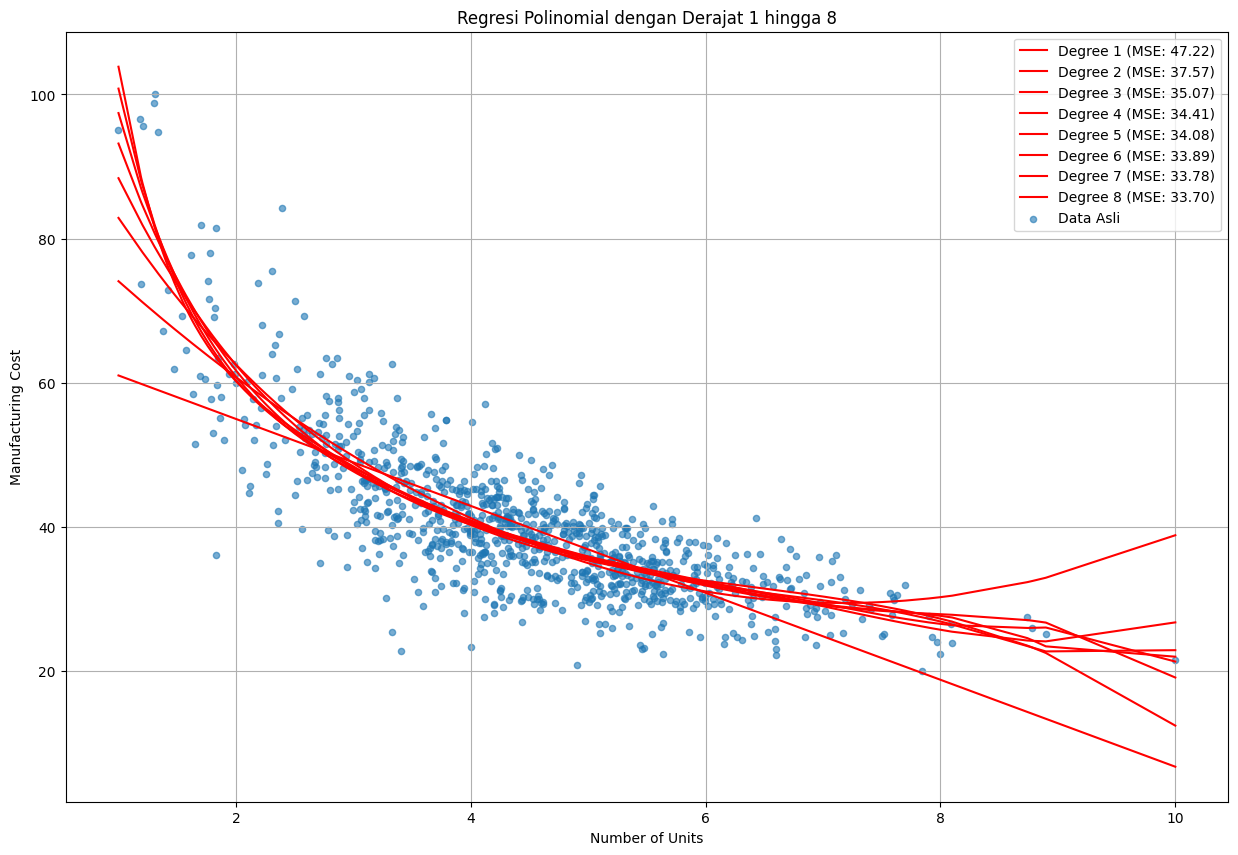

In [24]:
# mengubah data menjadi bentuk array numpy
x = np.array(x).reshape(-1, 1)
y = np.array(y)

# membuat plot untuk hasil regresi
plt.figure(figsize=(15, 10))

for degree in range(1, 9):
  # membuat objek polynimial dengan derajat terntentu
  poly_features = PolynomialFeatures(degree=degree)
  x_poly = poly_features.fit_transform(x)

  # membuat model regresi linear
  model = LinearRegression()
  model.fit(x_poly, y)

  # membuat prediksi
  y_pred = model.predict(x_poly)

  # menghitung mse
  mse = mean_squared_error(y, y_pred)

  # plot hasil regresi
  plt.plot(x, y_pred, label=f'Degree {degree} (MSE: {mse:.2f})', color = 'red')

plt.scatter(x, y, s=20, label='Data Asli', alpha=0.6)
plt.title('Regresi Polinomial dengan Derajat 1 hingga 8')
plt.xlabel('Number of Units')
plt.ylabel('Manufacturing Cost')
plt.legend()
plt.grid(True)
plt.show()

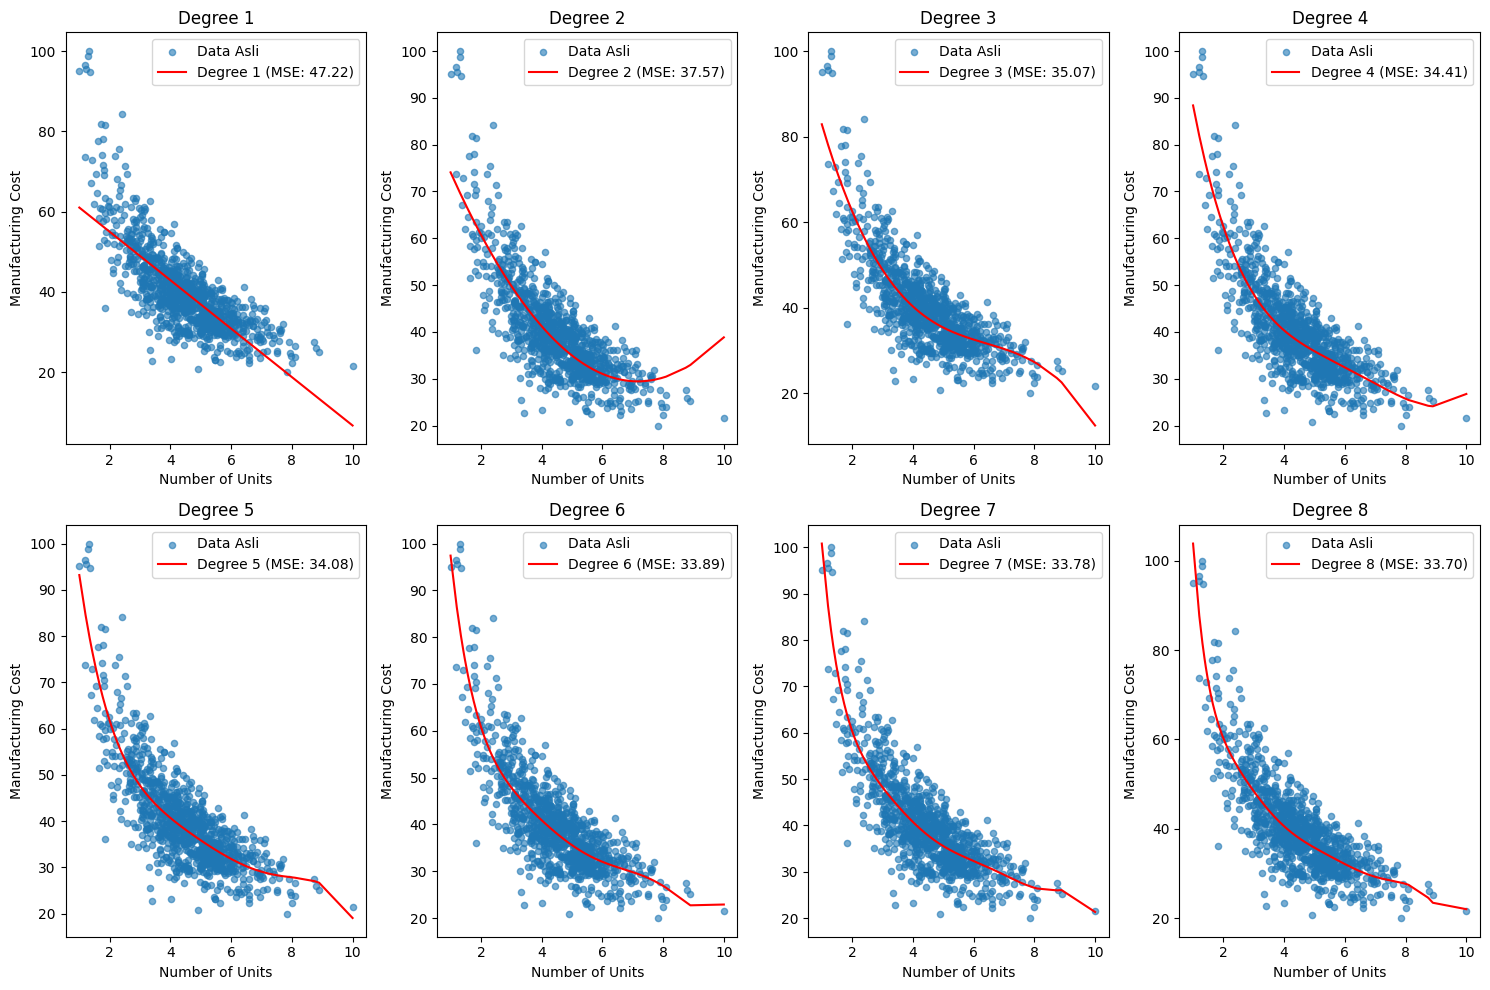

In [26]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Mendefinisikan variabel x dan y
x = df['Number of Units']
y = df['Manufacturing Cost']

# Mengubah bentuk x agar sesuai dengan Polynomial Regression
x = x.values.reshape(-1, 1)
y = y.values

# Membuat subplot
fig, axs = plt.subplots(2, 4, figsize=(15, 10))
axs = axs.flatten()

# Plotting hasil regresi untuk setiap derajat
for degree, ax in zip(range(1, 9), axs):
    # Transformasi fitur ke polynomial degree tertentu
    poly_features = PolynomialFeatures(degree=degree)
    x_poly = poly_features.fit_transform(x)

    # Membuat model regresi linear
    model = LinearRegression()
    model.fit(x_poly, y)

    # Membuat prediksi
    y_pred = model.predict(x_poly)

    # Menghitung MSE (Mean Squared Error)
    mse = mean_squared_error(y, y_pred)

    # Plot hasil regresi
    ax.scatter(x, y, s=20, label='Data Asli', alpha=0.6)
    ax.plot(x, y_pred, label=f'Degree {degree} (MSE: {mse:.2f})', color='red')
    ax.set_title(f'Degree {degree}')
    ax.set_xlabel('Number of Units')
    ax.set_ylabel('Manufacturing Cost')
    ax.legend()

plt.tight_layout()
plt.show()

